- Missing values, encoding, and feature distributions
    - The features with a releatively  normal distribution are 'baseline value', 'abnormal_short_term_variability', 'histogram_max', 'histogram_mode', 'histogram_mean', and 'histogram_median'. The features that are not relatively normal are 'accelerations', 'fetal_movement', 'uterine_contractions', 'light_decelerations', 'severe_decelerations', 'prolongued_decelerations', 'mean_value_of_short_term_variability', 'percentage_of_time_with_abnormal_long_term_variability', 'mean_value_of_long_term_variability', 'histogram_width', 'histogram_min', 'histogram_number_of_peaks', 'histogram_number_of_zeroes', 'histogram_variance', 'histogram_tendency', 'featl_health'. The data contained zero missing values. Therefore, I did not have to handle missing values. The only categorical data was the 'fetal_health' feature. That feature came encoded where a value of 1.0 means normal, 2.0 means suspect, and 3.0 means pathological.

- Outliers
    - I settled on using IQR as a general method of outlier detection. I used IQR because there are many features in this data set and more half of the features are not normally distributed meaning using a Z-score methodn would not be viable for many of the features. I also do not have enough domain knowledge to hard code in a threshold for the features in the dataset. Using IQR on all features does not work either because for some columns it will remove all observations. This leads me to decide which features need outliers removed. I settled on not removing outliers because I believe the observations observed are natural variation of the features which are important to observe.

- Feature Scaling
    - I decided to use normalization for similar reasons mentioned with respect to outlier removal. Most of the features are not normally distributed, and standardization is best used when the distribution of your data is normal. Therefore, I used normalization to scale the data to prevent potential bias.


- Model Evaluation

    - Evaluation of Logistic Regression:
        - precision: 0.7682550972024655
        - recall: 0.4484761628662772
        - f1 score: 0.4838635449663766
        - The logistic regression model is good at correctly predicting positive cases and bad at finding all instances of the positive class. The logistic regression is likely to predict true positive cases correctly, but is likely to predict false positives.

    - Evaluation of Neual Network:
        - precision: 0.7818744418177043
        - recall: 0.6634402549627358
        - f1 score: 0.707855275245695
        - The neural network is good at correctly predicting positive and okay at finding all instances of the positive class. The neural network is likely to predict true positive cases correctly, but is not great at finding all positive instances.

    - Evaluation of Decision Tree Classifier:
        - precision: 0.8067510388162562
        - recall: 0.7870931995633033
        - f1 score: 0.7963941508806913
        - The decision tree good at correctly predicting positive cases and good at finding all instances of the positive class. The decision tree is likely to predict true positives correctly and the model is good at finding all positive instances. The descision tree is the best out of all the models are correctly classifying fetal health.

    - Evaluation of Support Vector Classifier:
        - precision: 0.7689285714285714
        - recall: 0.5846640736356389
        - f1 score: 0.6428000127971334
        - The support vector classifier, like the logistic regression, good at correctly predicting positive cases, but not good at finding all instances of the positive class. The support vector classifier is likely to predict true positive cases correctly but is not great at finding all positive instances. It performs with respect to recall better than logistic regression but is worse than both the decision tree and the neural network.


- Bias & Variance

    - The logistic regression, neural network, and support vector classifier all perform identical on the training set as the testing set. This indicates that these models may be underfit and are not capturing the relationship between the input variables and the target variable as well as it could.
    
    - The decision tree is the best model because it performs nearly perfectly on the training set, and it performs well on the testing set. There is not a significant drop in performance on the testing set indicating that the decision tree is not overfit. These facts combined shows that the decision tree has little bias and proper amounts of variance.
    

IMPORT LIBRARIES

In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

IMPORT DATA

In [2]:
orig_data = pd.read_csv("fetal_health.csv")

CHECK FOR MISSING DATA

In [21]:
orig_data.isna().sum()

baseline value                                            0
accelerations                                             0
fetal_movement                                            0
uterine_contractions                                      0
light_decelerations                                       0
severe_decelerations                                      0
prolongued_decelerations                                  0
abnormal_short_term_variability                           0
mean_value_of_short_term_variability                      0
percentage_of_time_with_abnormal_long_term_variability    0
mean_value_of_long_term_variability                       0
histogram_width                                           0
histogram_min                                             0
histogram_max                                             0
histogram_number_of_peaks                                 0
histogram_number_of_zeroes                                0
histogram_mode                          

CHECK FEATURE DISTRIBUTION

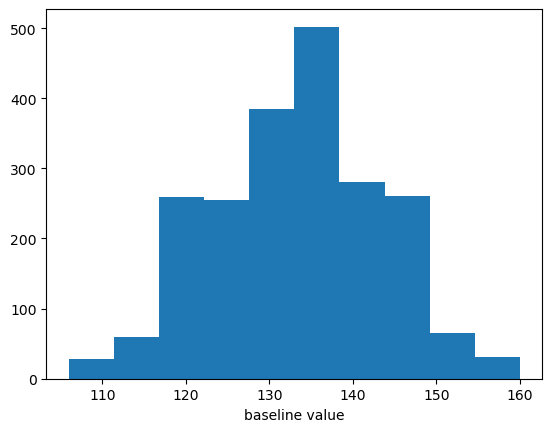

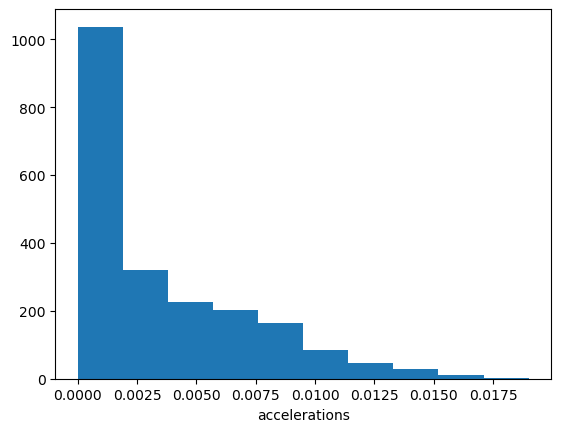

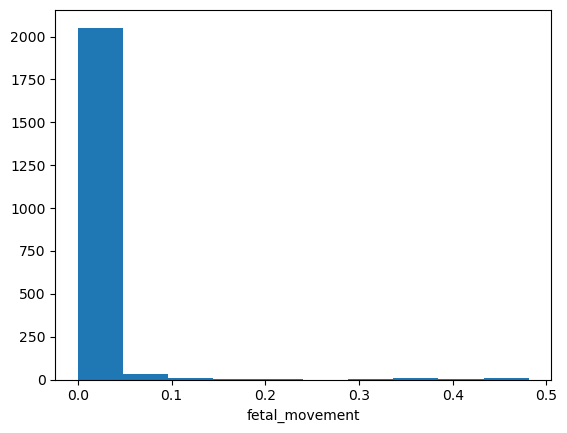

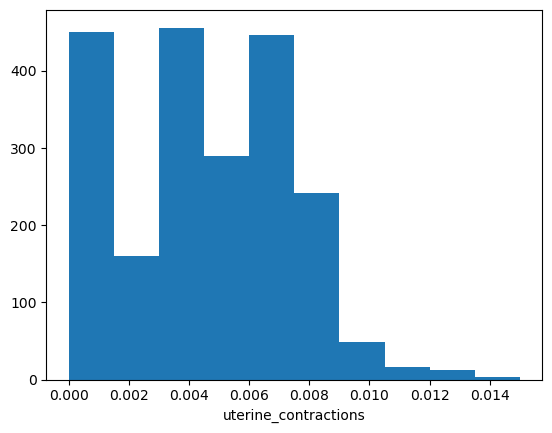

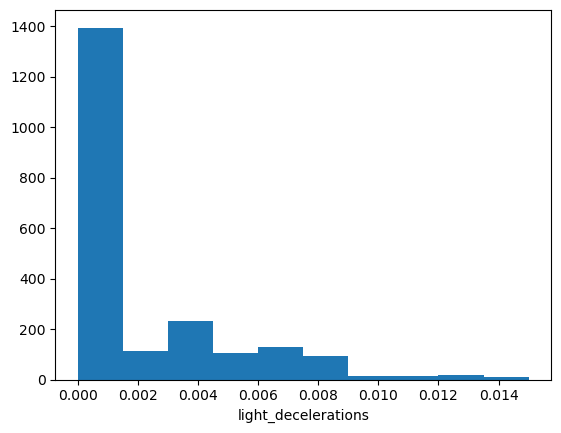

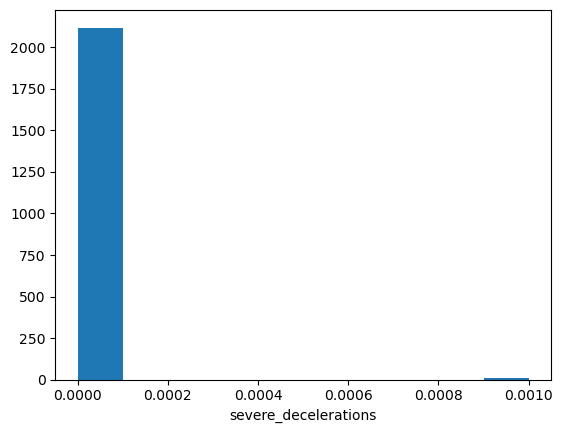

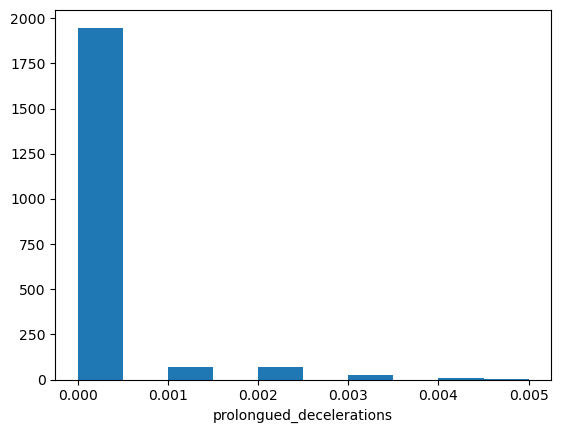

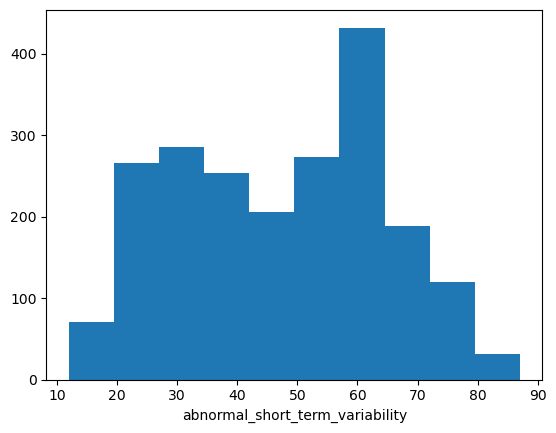

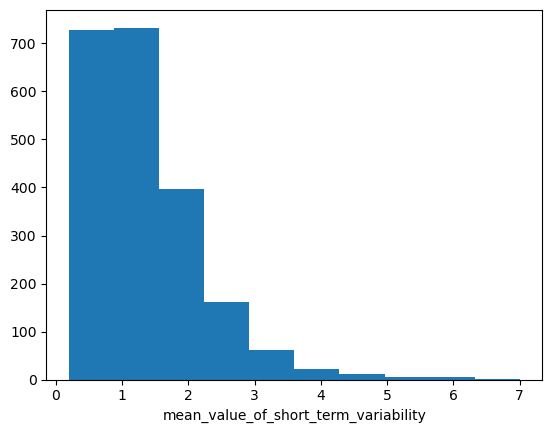

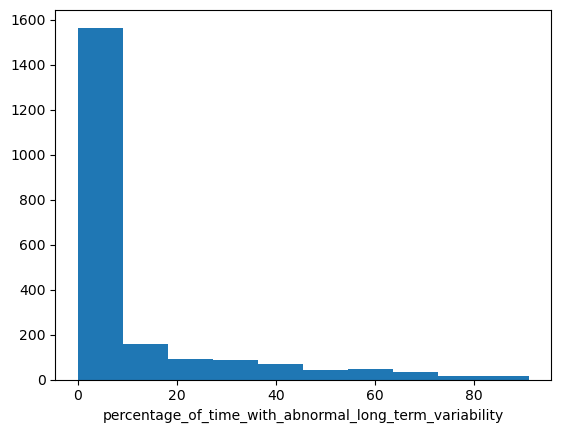

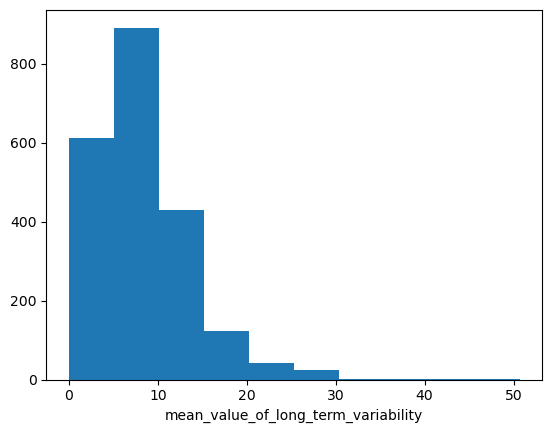

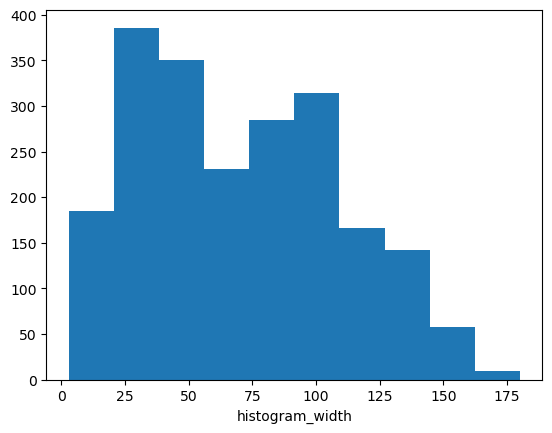

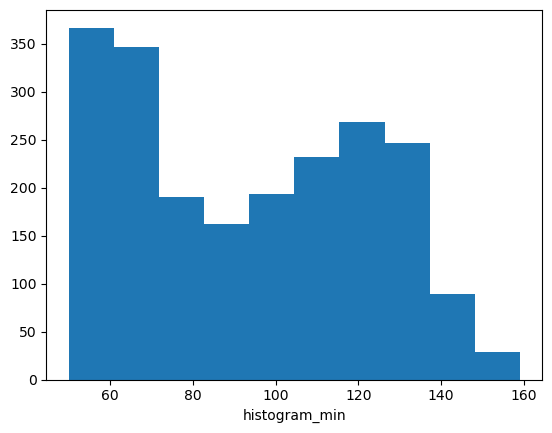

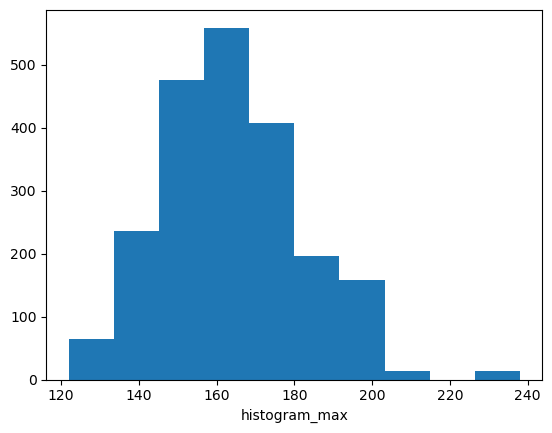

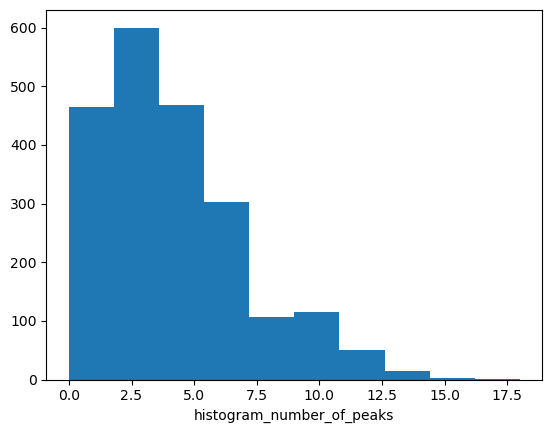

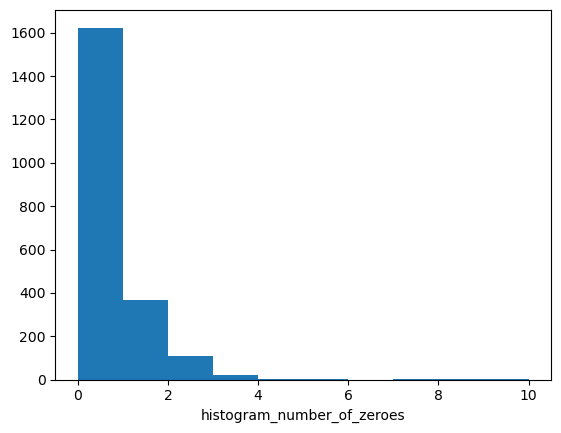

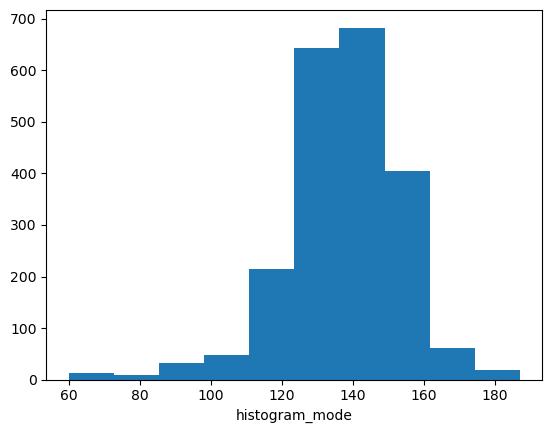

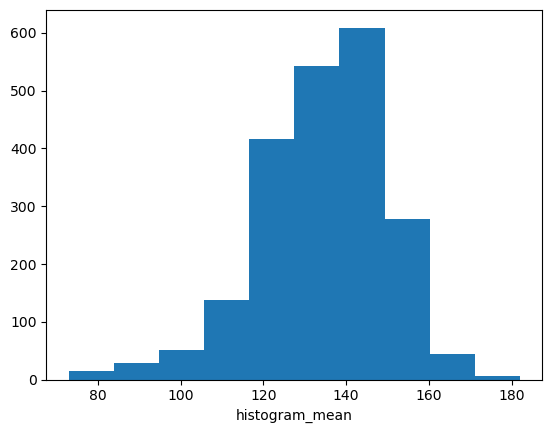

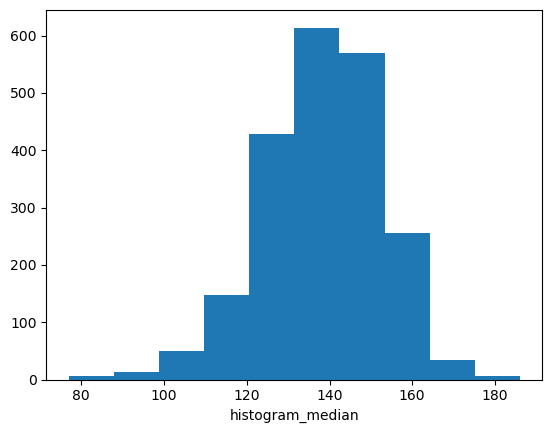

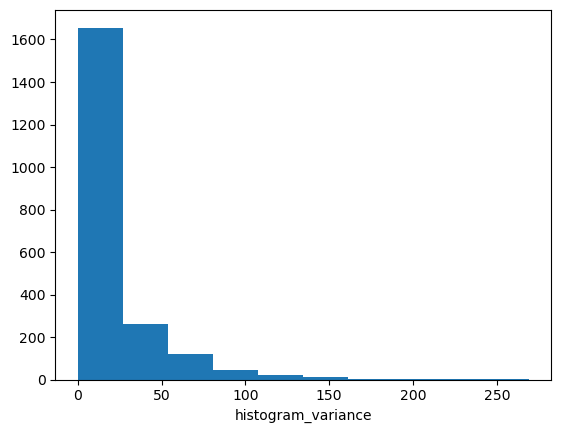

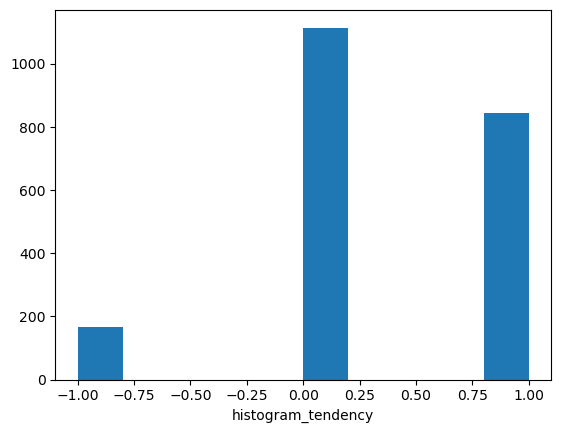

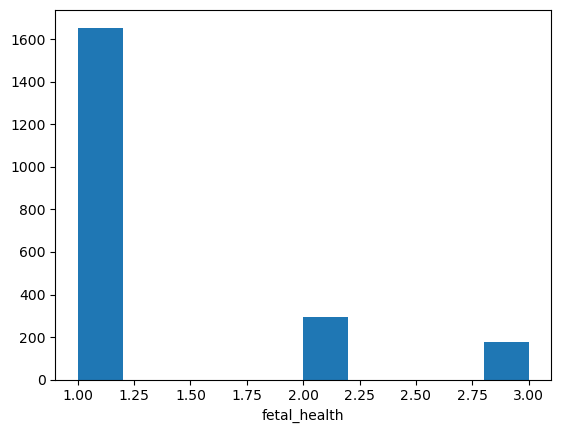

In [4]:
cols = orig_data.columns
for col in cols:
    plt.hist(orig_data[col])
    plt.xlabel(col)
    plt.show()

REMOVE OUTLIERS

In [5]:
cleaned_data = orig_data

In [6]:
for col in cleaned_data.columns:
    print(col)
    Q1 = np.percentile(cleaned_data[col], 25, method='midpoint')
    Q3 = np.percentile(cleaned_data[col], 75, method='midpoint')
    IQR = Q3 - Q1

    maxThreshold = Q3+1.5*IQR
    minThreshold = Q1-1.5*IQR


    print("Number of observations left if outliers removed: " + str(len(cleaned_data[(cleaned_data[col] < maxThreshold) & (cleaned_data[col] > minThreshold)])))

baseline value
Number of observations left if outliers removed: 2126
accelerations
Number of observations left if outliers removed: 2112
fetal_movement
Number of observations left if outliers removed: 1819
uterine_contractions
Number of observations left if outliers removed: 2125
light_decelerations
Number of observations left if outliers removed: 1976
severe_decelerations
Number of observations left if outliers removed: 0
prolongued_decelerations
Number of observations left if outliers removed: 0
abnormal_short_term_variability
Number of observations left if outliers removed: 2126
mean_value_of_short_term_variability
Number of observations left if outliers removed: 2043
percentage_of_time_with_abnormal_long_term_variability
Number of observations left if outliers removed: 1817
mean_value_of_long_term_variability
Number of observations left if outliers removed: 2055
histogram_width
Number of observations left if outliers removed: 2126
histogram_min
Number of observations left if outlie

In [7]:
cleaned_data['fetal_health']

0       2.0
1       1.0
2       1.0
3       1.0
4       1.0
       ... 
2121    2.0
2122    2.0
2123    2.0
2124    2.0
2125    1.0
Name: fetal_health, Length: 2126, dtype: float64

SPLIT THE DATA INTO TRAINING & TESTING

In [8]:
X = cleaned_data.loc[:,cleaned_data.columns != 'fetal_health']
y = cleaned_data['fetal_health']

In [9]:
# import split function that maintains percentage of samples for each class
from sklearn.model_selection import train_test_split

# import evaluation metrics
from sklearn import metrics

In [10]:
# split data into training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30,stratify=y) 

In [11]:
y_train

592     1.0
1833    1.0
1114    1.0
1034    1.0
1942    1.0
       ... 
1092    1.0
1546    2.0
1830    1.0
2008    1.0
1578    1.0
Name: fetal_health, Length: 1488, dtype: float64

NORMALIZE DATA

In [12]:
# import a normalizer
from sklearn.preprocessing import Normalizer

x_scaler = Normalizer()

y_scaler = Normalizer()

colNames = X_train.columns.values.tolist()
X_train[colNames] = x_scaler.fit_transform(X_train[colNames])

colNames = X_test.columns.values.tolist()
X_test[colNames] = x_scaler.transform(X_test[colNames])


TRAIN & TEST CLASSIFIER MODELS

In [13]:
# import logistic regression model
from sklearn.linear_model import LogisticRegression

# train model
model1 = LogisticRegression().fit(X_train,y_train)

# test model on training
preds = model1.predict(X_train)

# evaluate on training
print(f"precision: {metrics.precision_score(y_train,preds,average='macro')}")
print(f"recall: {metrics.recall_score(y_train,preds,average='macro')}")
print(f"f1 score: {metrics.f1_score(y_train,preds,average='macro')}")

precision: 0.6733160214038402
recall: 0.41314370266177697
f1 score: 0.43504668807614894


In [14]:
# test model on testing
preds = model1.predict(X_test)

# evaluate on test
print(f"precision: {metrics.precision_score(y_test,preds,average='macro')}")
print(f"recall: {metrics.recall_score(y_test,preds,average='macro')}")
print(f"f1 score: {metrics.f1_score(y_test,preds,average='macro')}")

precision: 0.7682550972024655
recall: 0.4484761628662772
f1 score: 0.4838635449663766


In [15]:
# import neural network model
from sklearn.neural_network import MLPClassifier

# train model
model2 = MLPClassifier().fit(X_train,y_train)

# test model on training
preds = model2.predict(X_train)

# evaluate on training
print(f"precision: {metrics.precision_score(y_train,preds,average='macro')}")
print(f"recall: {metrics.recall_score(y_train,preds,average='macro')}")
print(f"f1 score: {metrics.f1_score(y_train,preds,average='macro')}")

precision: 0.7818744418177043
recall: 0.6634402549627358
f1 score: 0.707855275245695


/Users/bretttracy/anaconda3/lib/python3.11/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [16]:
# test model
preds = model2.predict(X_test)

# evaluate
print(f"precision: {metrics.precision_score(y_test,preds,average='macro')}")
print(f"recall: {metrics.recall_score(y_test,preds,average='macro')}")
print(f"f1 score: {metrics.f1_score(y_test,preds,average='macro')}")

precision: 0.8018965161822305
recall: 0.6621259863353938
f1 score: 0.7145986215753658


In [17]:
# import decision tree model
from sklearn.tree import DecisionTreeClassifier

# train model
model3 = DecisionTreeClassifier().fit(X_train,y_train)


# test model on training
preds = model3.predict(X_train)

# evaluate on training
print(f"precision: {metrics.precision_score(y_train,preds,average='macro')}")
print(f"recall: {metrics.recall_score(y_train,preds,average='macro')}")
print(f"f1 score: {metrics.f1_score(y_train,preds,average='macro')}")

precision: 0.9997123957434569
recall: 0.998389694041868
f1 score: 0.9990490333057798


In [18]:
# test model
preds = model3.predict(X_test)

# evaluate
print(f"precision: {metrics.precision_score(y_test,preds,average='macro')}")
print(f"recall: {metrics.recall_score(y_test,preds,average='macro')}")
print(f"f1 score: {metrics.f1_score(y_test,preds,average='macro')}")

precision: 0.7770108321415329
recall: 0.7883247167395453
f1 score: 0.7820472408050572


In [19]:
# import support vector classifier model
from sklearn.svm import SVC

# train model
model4 = SVC().fit(X_train,y_train)

# test model
preds = model4.predict(X_train)

# evaluate
print(f"precision: {metrics.precision_score(y_train,preds,average='macro')}")
print(f"recall: {metrics.recall_score(y_train,preds,average='macro')}")
print(f"f1 score: {metrics.f1_score(y_train,preds,average='macro')}")

precision: 0.5699028645058976
recall: 0.47039330496931914
f1 score: 0.48777518777518775


In [20]:
# test model
preds = model4.predict(X_test)

# evaluate
print(f"precision: {metrics.precision_score(y_test,preds,average='macro')}")
print(f"recall: {metrics.recall_score(y_test,preds,average='macro')}")
print(f"f1 score: {metrics.f1_score(y_test,preds,average='macro')}")

precision: 0.6040305010893247
recall: 0.4654088050314466
f1 score: 0.4879568477404366
